Primero cargamos las librerias necesarias

In [17]:
#cargar csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Cargamos los archivos

In [18]:
#cargar csv
df2017 = pd.read_csv('data/champions-league-2017-CentralEuropeanStandardTime.csv')
df2018 = pd.read_csv('data/champions-league-2018-WEuropeStandardTime.csv')
df2019 = pd.read_csv('data/champions-league-2019-WEuropeStandardTime.csv')
df2020 = pd.read_csv('data/champions-league-2020-UTC.csv')
df2021 = pd.read_csv('data/champions-league-2021-UTC.csv')
df2022 = pd.read_csv('data/champions-league-2022-UTC.csv')
wins = pd.read_csv('data/wins.csv')
uefa_ranking = pd.read_csv('data/UEFA_Ranking.csv')
equipos_goles = pd.read_csv('data/equipos-goles.csv')

Gráfica de puntos UEFA

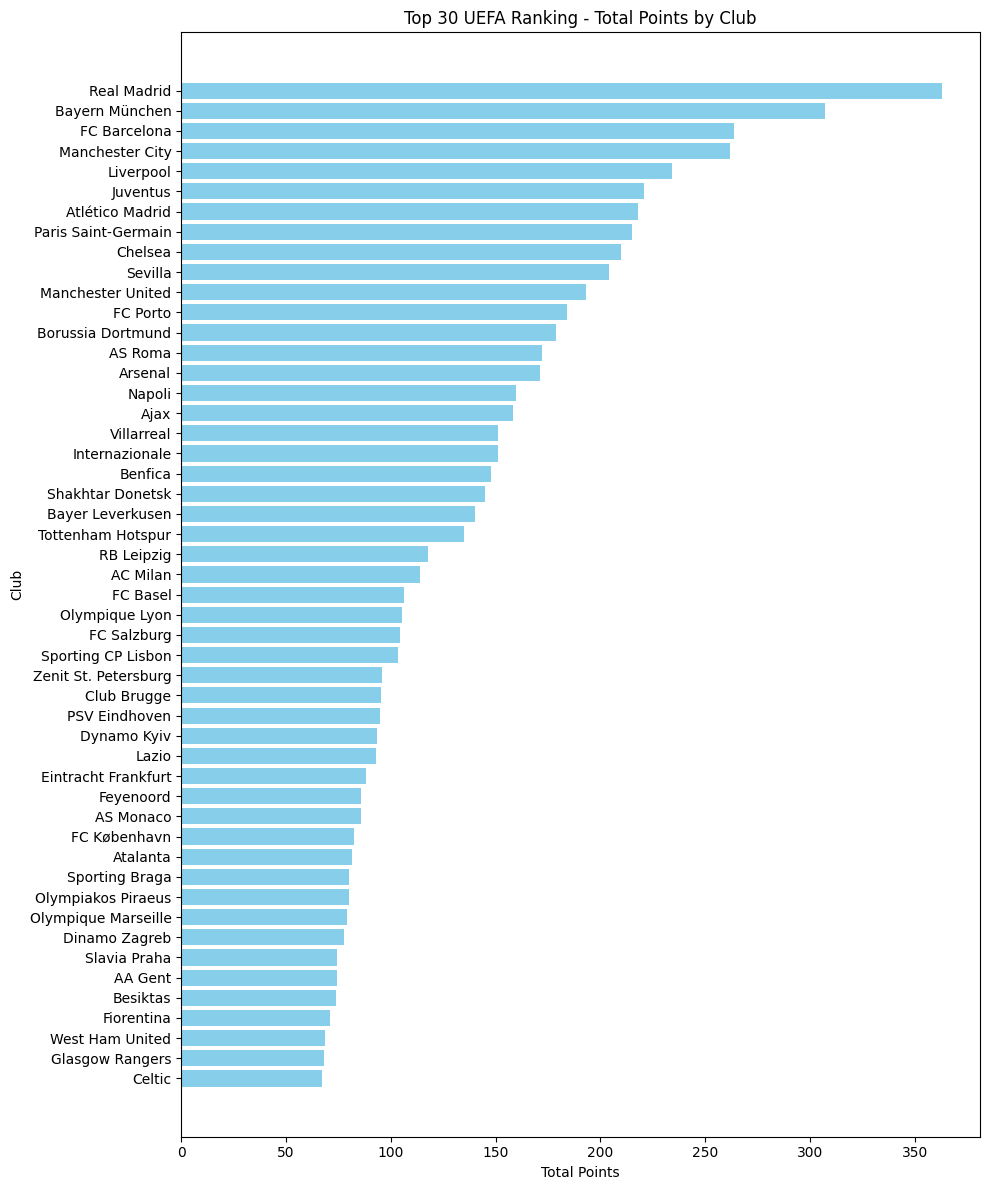

In [19]:
#ordenar uefa ranking de mayor a menor
uefa_ranking = uefa_ranking.sort_values(by='Total Points', ascending=False)

# Seleccionar las columnas necesarias para la gráfica y las primeras 50 filas
df_plot = uefa_ranking[['Club', 'Total Points']].head(50)

# Ordenar los datos por puntos totales
df_plot = df_plot.sort_values(by='Total Points', ascending=True)

# Graficar los datos
plt.figure(figsize=(10, 12))
plt.barh(df_plot['Club'], df_plot['Total Points'], color='skyblue')
plt.xlabel('Total Points')
plt.ylabel('Club')
plt.title('Top 30 UEFA Ranking - Total Points by Club')
plt.tight_layout()
plt.show()

Gráfico de secciones. Porcentaje de equipos con puntuacion mayor a 300, 200, 100

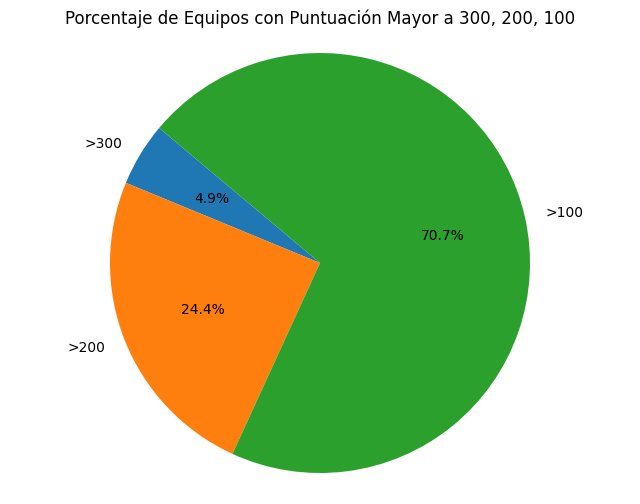

In [20]:
# Calcular el porcentaje de equipos con una puntuación mayor a 300, 200 y 100
total_equipos = len(uefa_ranking)
puntos_mayores_300 = len(uefa_ranking[uefa_ranking['Total Points'] > 300]) / total_equipos * 100
puntos_mayores_200 = len(uefa_ranking[uefa_ranking['Total Points'] > 200]) / total_equipos * 100
puntos_mayores_100 = len(uefa_ranking[uefa_ranking['Total Points'] > 100]) / total_equipos * 100

# Crear los datos para el gráfico
porcentajes = [puntos_mayores_300, puntos_mayores_200, puntos_mayores_100]
labels = ['>300', '>200', '>100']

# Crear el gráfico de pastel
plt.figure(figsize=(8, 6))
plt.pie(porcentajes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Porcentaje de Equipos con Puntuación Mayor a 300, 200, 100')
plt.axis('equal')  # Ajustar el gráfico para que sea un círculo
plt.show()

Número de Champions ganadas

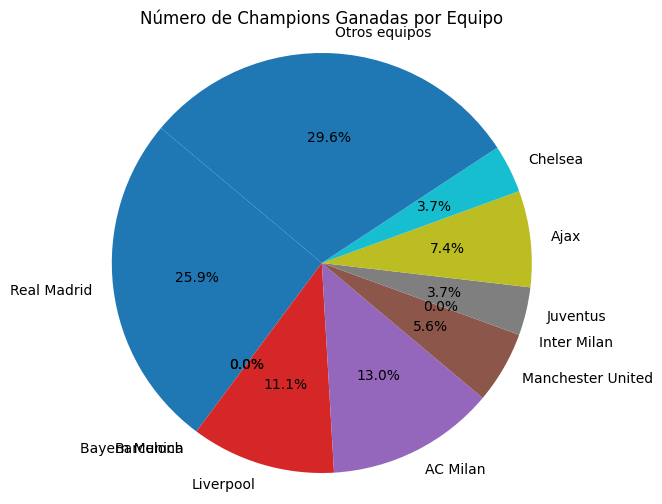

In [24]:
# Crear un diccionario a partir de los datos de victorias
dict_wins = dict(zip(wins['Equipo'], wins['Champions']))

# Crear una lista de equipos con sus victorias y establecer 0 para los equipos que no aparecen en el archivo de victorias
equipos_champions = list(wins['Equipo'])
victorias_por_equipo = [dict_wins.get(equipo, 0) for equipo in equipos_champions]

# Agregar la sección 'Otros equipos' con 0 victorias para los equipos que no están en la lista de equipos de champions
otros_equipos = wins[~wins['Equipo'].isin(equipos_champions)]
victorias_otros = 0

equipos_champions.append('Otros equipos')
victorias_por_equipo.append(victorias_otros)

# Crear el gráfico de pastel
plt.figure(figsize=(8, 6))
plt.pie(victorias_por_equipo, labels=equipos_champions, autopct='%1.0f', startangle=140)
plt.title('Número de Champions Ganadas por Equipo')
plt.axis('equal')
plt.show()